# 7. Analyzing Time-Series Data: website_date

trying without timestamp as index - not possible to perfom ADF
tipmestamp as index does not have to be explicitly changed, is going to be an index with grouping by

## Containing:
#### 1. Importing your libraries and data
#### 2. Subsetting, wrangling, and cleaning time-series data
#### 3. Time series analysis: decomposition
#### 4. Augmented Dickey-Fuller Test

#### 1. Importing your libraries and data

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [2]:
# Define path

path = r'/Users/sophie/Desktop/CareerFoundry /10 2023 missing migrants'
path

'/Users/sophie/Desktop/CareerFoundry /10 2023 missing migrants'

In [3]:
df_mm = pd.read_pickle(os.path.join(path, 'Data', 'prepared data', 'df_mm.pkl'))
df_mm.head()

,main_ID,incident_ID,inc_type,region_inc,website_date_new,month_num,year,tot_dead_miss,tot_migrants,tot_survive,...,reg_origin,cause_death,country_origin,migration_route,loc_death,info_source,UNSD_geo_group,source_quality,inc_type_num,vict_per_incidents
0,2014.MMP00001,2014.MMP00001,Incident,North America,2014-01-06,1,2014,1,1,0,...,Central America,Mixed or unknown,Guatemala,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,Northern America,5,1,1-4
1,2014.MMP00002,2014.MMP00002,Incident,North America,2014-01-12,1,2014,1,1,0,...,Latin America / Caribbean (P),Mixed or unknown,Unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,Northern America,5,1,1-4
2,2014.MMP00003,2014.MMP00003,Incident,North America,2014-01-14,1,2014,1,1,0,...,Latin America / Caribbean (P),Mixed or unknown,Unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,Northern America,5,1,1-4
3,2014.MMP00004,2014.MMP00004,Incident,North America,2014-01-16,1,2014,1,1,0,...,Central America,Violence,Mexico,US-Mexico border crossing,"near Douglas, Arizona, USA","Ministry of Foreign Affairs Mexico, Pima Count...",Northern America,5,1,1-4
4,2014.MMP00005,2014.MMP00005,Incident,Europe,2014-01-16,1,2014,1,3,2,...,Northern Africa,Harsh environmental conditions / lack of adequ...,Sudan,Unknown,Border between Russia and Estonia,EUBusiness (Agence France-Presse),Northern Europe,1,1,1-4


In [4]:
df_mm.shape

(13493, 24)

In [5]:
df_mm.columns

Index(['main_ID', 'incident_ID', 'inc_type', 'region_inc', 'website_date_new',
       'month_num', 'year', 'tot_dead_miss', 'tot_migrants', 'tot_survive',
       'identified_demogr', 'unidentified_demogr', 'latitude', 'longitude',
       'reg_origin', 'cause_death', 'country_origin', 'migration_route',
       'loc_death', 'info_source', 'UNSD_geo_group', 'source_quality',
       'inc_type_num', 'vict_per_incidents'],
      dtype='object')

In [6]:
type(df_mm)

pandas.core.frame.DataFrame

#### 2. Subsetting, wrangling, and cleaning time-series data

In [7]:
# Check for missing values

df_mm.isnull().sum()

# No missing values to handle

main_ID                0
incident_ID            0
inc_type               0
region_inc             0
website_date_new       0
month_num              0
year                   0
tot_dead_miss          0
tot_migrants           0
tot_survive            0
identified_demogr      0
unidentified_demogr    0
latitude               0
longitude              0
reg_origin             0
cause_death            0
country_origin         0
migration_route        0
loc_death              0
info_source            0
UNSD_geo_group         0
source_quality         0
inc_type_num           0
vict_per_incidents     0
dtype: int64

In [8]:
# Duplicates check

dups = df_mm.duplicated()
dups.shape # No dups

(13493,)

In [9]:
# Creating a subset for time-series analyses of variables of interest (total number of deads and missings and website dates)
# There are no irrelevant dates that have to be included, every incident since 2014 should be included in the analysis

sub_dates = df_mm[['website_date_new', 'tot_dead_miss']]

# Print the selected columns
print(sub_dates)

      website_date_new  tot_dead_miss
0           2014-01-06              1
1           2014-01-12              1
2           2014-01-14              1
3           2014-01-16              1
4           2014-01-16              1
...                ...            ...
13488       2023-10-11              1
13489       2023-10-13              7
13490       2023-10-12              2
13491       2023-10-01              1
13492       2023-10-17              1

[13493 rows x 2 columns]


In [10]:
# Set the "Date" column as the index

#from datetime import datetime

#sub_dates['datetime'] = pd.to_datetime(sub_dates['website_date_new']) # Create a datetime column from "website_date_new"
#sub_dates = sub_dates.set_index('datetime') # Set the datetime as the index of the dataframe.
#sub_dates.drop(['website_date_new'], axis=1, inplace=True) # Drop the "Date" column.
#sub_dates.head()

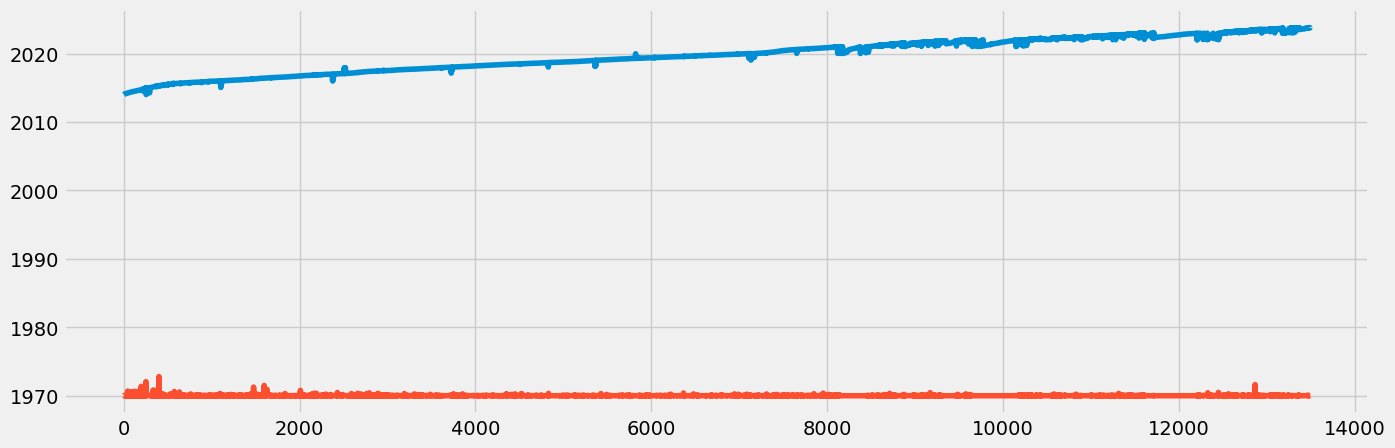

In [11]:
# Plot the new data set - create a line chart

plt.figure(figsize=(15,5), dpi=100)
plt.plot(sub_dates)

In [12]:
# Check for missing values (you shouldn't have any)

sub_dates.isnull().sum() 

website_date_new    0
tot_dead_miss       0
dtype: int64

In [13]:
# Check for duplicates

dups = sub_dates.duplicated()
dups.sum()

6878

In [14]:
duplicates = sub_dates[dups]
print(duplicates)

      website_date_new  tot_dead_miss
4           2014-01-16              1
9           2014-01-24              1
13          2014-01-29              1
15          2014-01-30              1
20          2014-02-16              1
...                ...            ...
13482       2023-10-10              1
13484       2023-10-10              1
13485       2023-10-10              1
13490       2023-10-12              2
13491       2023-10-01              1

[6878 rows x 2 columns]


#### Data doesn't have a regular time interval (e.g., daily, hourly):
it's just a list of dates with different intervals between incidents, so using seasonal_decompose directly is not appropriate. This function is designed for time series data with a known and regular frequency.
In such cases, I need to use different time series analysis techniques that don't rely on a fixed frequency. One approach is to use rolling averages or moving averages to smooth out the data and identify trends or patterns.

In [15]:
#### Using website_date_new, the data will be very noisy.
#### In this case, you need to smooth the data before dickey_fuller test, such as

#data_smoothed = sub_dates.rolling(window=10).mean()

In [16]:
#df2 = sub_dates.groupby('website_date_new').agg({'tot_dead_miss':['sum']})

#plt.figure(figsize=(18,7), dpi=100) 
#plt.title('Total of deaths and missings per year')
#plt.xlabel('Date')
#plt.ylabel('value')
#plt.plot(df2)

### 3. Time series analysis: decomposition

In [17]:
# Decompose the time series using an additive model

#decomposition = sm.tsa.seasonal_decompose(df2, model='additive')

In [20]:
# After smoothing data, same error when trying to use the sm.tsa.seasonal_decompose function on the aggregated data, as the function still expects the data to have a regular frequency.
# Try alternative decomposition methods or analysis techniques that do not rely on a fixed frequency, such as the Singular Spectrum Analysis (SSA):

from statsmodels.tsa.filters.hp_filter import hpfilter

# Decompose the smoothed and aggregated data using the Hodrick-Prescott filter (HP filter)
trend, cycle = hpfilter(sub_dates['tot_dead_miss'], lamb=1600)
sub_dates['trend'] = trend
sub_dates['cycle'] = cycle

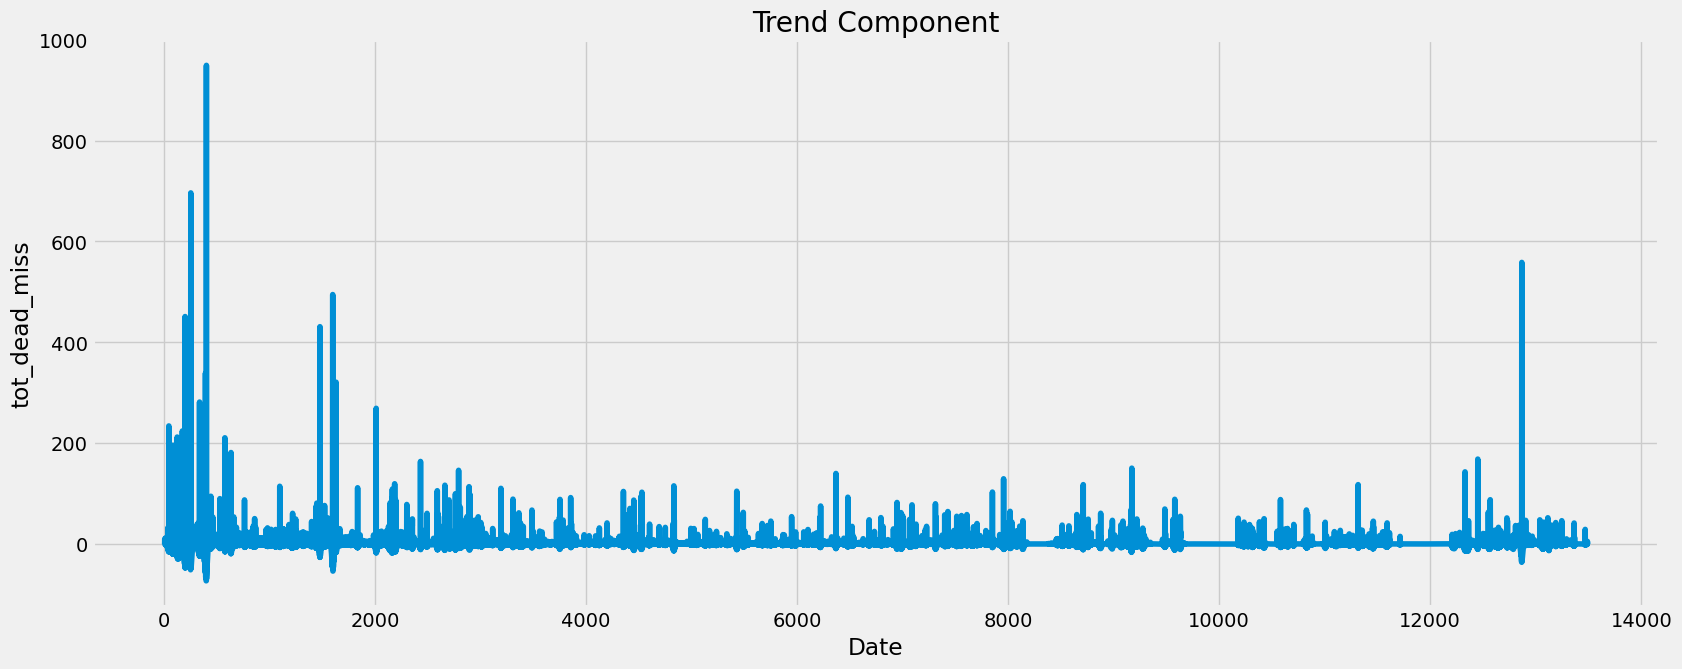

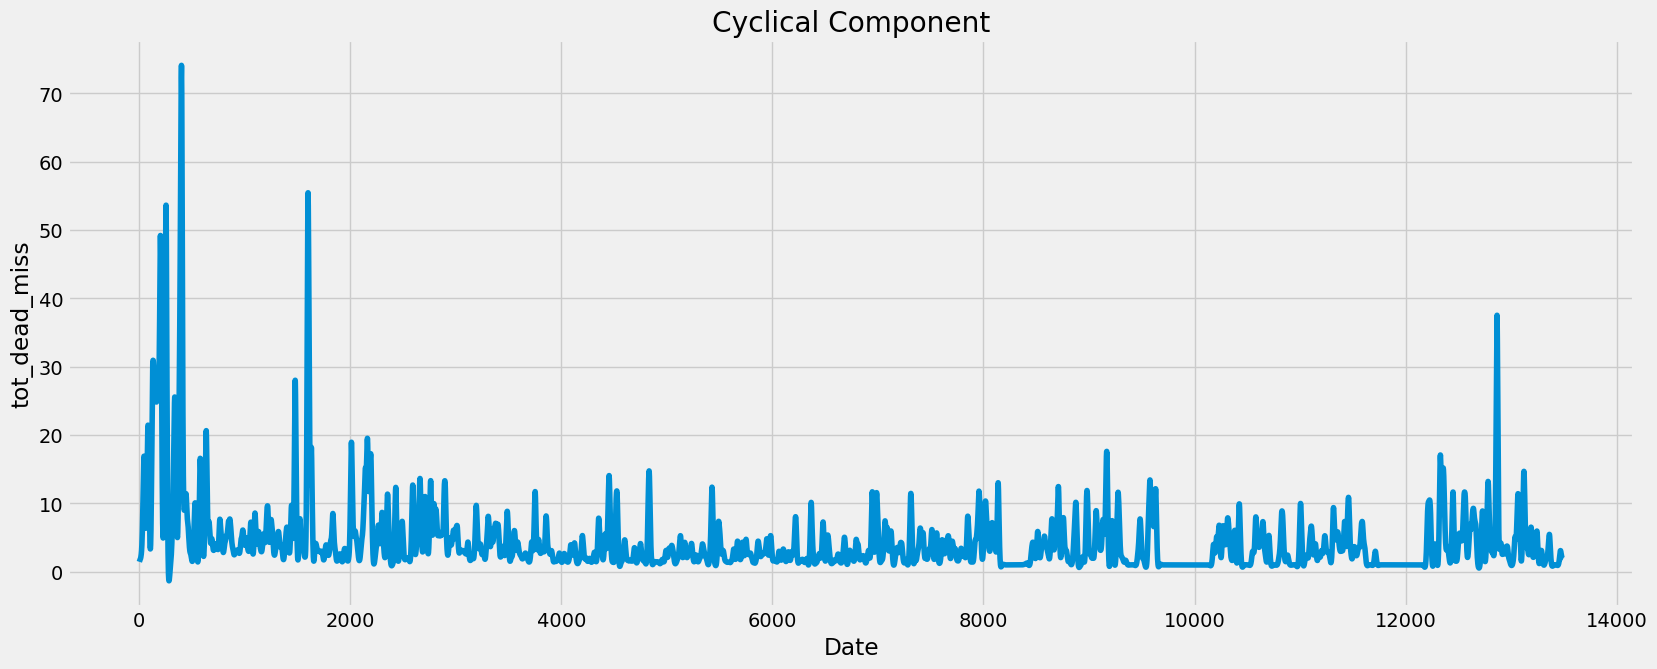

In [22]:
# Plot the trend component
plt.figure(figsize=(18, 7), dpi=100)
plt.title('Trend Component')
plt.xlabel('Date')
plt.ylabel('tot_dead_miss')
plt.plot(sub_dates['trend'])

# Plot the cyclical component
plt.figure(figsize=(18, 7), dpi=100)
plt.title('Cyclical Component')
plt.xlabel('Date')
plt.ylabel('tot_dead_miss')
plt.plot(sub_dates['cycle'])

#### Interpretation: no apparent trends (mean seams constant) or seasonality. However, data does not appear relatively constant over time (manly in early years of recording). Standard deviation (volatility) is varying.

- we could perform local tests (testing mean, sd in small chunks)
- perform the augnmented dickey-fuller test

https://www.youtube.com/watch?v=1opjnegd_hA
https://github.com/ritvikmath/Time-Series-Analysis/blob/master/Augmented%20Dickey-Fuller%20Test.ipynb

### 4. Augmented Dickey-Fuller Test

In [23]:
# Import additional module

from statsmodels.tsa.stattools import adfuller

In [25]:
result = adfuller(sub_dates)
if result[1] <= 0.05:
    print("Data is likely stationary.")
else:
    print("Data is likely not stationary.")

TypeError: float() argument must be a string or a real number, not 'Timestamp'

In [ ]:
df2.head()

In [ ]:
df3 = df2[['tot_dead_miss']]

# Print the selected columns
print(df3)

In [ ]:
result = adfuller(df3)
if result[1] <= 0.05:
    print("Data is likely stationary.")
else:
    print("Data is likely not stationary.")

In [ ]:
def perform_adf_test(df3):
    result = adfuller(df3)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])

In [ ]:
perform_adf_test(df3)

#### Data is stationary.